# Descriptive statistics in python

---

In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as st
from scipy.stats import iqr

---
### Initialization

In [2]:
# Loading data
df_bank = pd.read_csv(f"../../../data/csv/bankdata.csv")
df_bank

,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
0,48,FEMALE,INNER_CITY,17546.00,NO,1,NO,NO,NO,NO,YES
1,40,MALE,TOWN,30085.10,YES,3,YES,NO,YES,YES,NO
2,51,FEMALE,INNER_CITY,16575.40,YES,0,YES,YES,YES,NO,NO
3,23,FEMALE,TOWN,20375.40,YES,3,NO,NO,YES,NO,NO
4,57,FEMALE,RURAL,50576.30,YES,0,NO,YES,NO,NO,NO
...,...,...,...,...,...,...,...,...,...,...,...
595,61,FEMALE,INNER_CITY,47025.00,NO,2,YES,YES,YES,YES,NO
596,30,FEMALE,INNER_CITY,9672.25,YES,0,YES,YES,YES,NO,NO
597,31,FEMALE,TOWN,15976.30,YES,0,YES,YES,NO,NO,YES
598,29,MALE,INNER_CITY,14711.80,YES,0,NO,YES,NO,YES,NO


#### Dataframe details

In [3]:
df_bank.shape

(600, 11)

In [4]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          600 non-null    int64  
 1   sex          600 non-null    object 
 2   region       600 non-null    object 
 3   income       600 non-null    float64
 4   married      600 non-null    object 
 5   children     600 non-null    int64  
 6   car          600 non-null    object 
 7   save_act     600 non-null    object 
 8   current_act  600 non-null    object 
 9   mortgage     600 non-null    object 
 10  pep          600 non-null    object 
dtypes: float64(1), int64(2), object(8)
memory usage: 51.7+ KB


In [171]:
df_bank.describe(include = 'all')

,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
count,600.000000,600,600,600.000000,600,600.000000,600,600,600,600,600
unique,NaN,2,4,NaN,2,NaN,2,2,2,2,2
top,NaN,FEMALE,INNER_CITY,NaN,YES,NaN,NO,YES,YES,NO,NO
freq,NaN,300,269,NaN,396,NaN,304,414,455,391,326
mean,42.395000,NaN,NaN,27524.031217,NaN,1.011667,NaN,NaN,NaN,NaN,NaN
std,14.424947,NaN,NaN,12899.468246,NaN,1.056752,NaN,NaN,NaN,NaN,NaN
min,18.000000,NaN,NaN,5014.210000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,30.000000,NaN,NaN,17264.500000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
50%,42.000000,NaN,NaN,24925.300000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN
75%,55.250000,NaN,NaN,36172.675000,NaN,2.000000,NaN,NaN,NaN,NaN,NaN


In [163]:
df_bank.mode()

,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
0,40,FEMALE,INNER_CITY,38248.3,YES,0.0,NO,YES,YES,NO,NO
1,43,MALE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


---
### Analysis and Visualization

#### Age and Sex

In [101]:
df_bank['age'].describe()

count    600.000000
mean      42.395000
std       14.424947
min       18.000000
25%       30.000000
50%       42.000000
75%       55.250000
max       67.000000
Name: age, dtype: float64

In [144]:
# Male age statistics
df_bank.groupby('sex').get_group('MALE')['age'].describe()

count    300.000000
mean      41.096667
std       14.077924
min       18.000000
25%       29.000000
50%       40.000000
75%       52.000000
max       67.000000
Name: age, dtype: float64

In [150]:
# Female age statistics
df_bank.groupby('sex').get_group('FEMALE')['age'].describe()

count    300.000000
mean      43.693333
std       14.672545
min       18.000000
25%       31.000000
50%       44.000000
75%       57.000000
max       67.000000
Name: age, dtype: float64

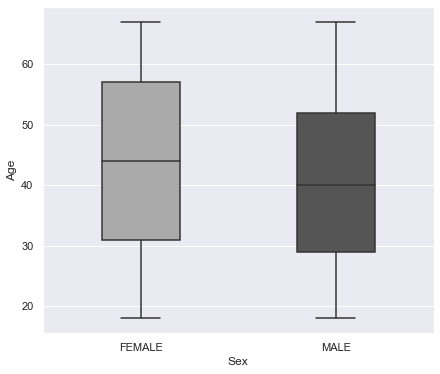

In [162]:
sns.set_style(style='darkgrid')

g = sns.boxplot(
    data = df_bank,
    y = 'age',
    x = 'sex',
    width = .4,
    palette = 'gray_r'
)

g.set_xlabel('Sex');
g.set_ylabel('Age');


In [169]:
print(f"Male group age interquartile range value: {iqr(df_bank.groupby('sex').get_group('MALE')['age'])}")
print(f"Female group age interquartile range value: {iqr(df_bank.groupby('sex').get_group('FEMALE')['age'])}")

Male group age interquartile range value: 23.0
Female group age interquartile range value: 26.0


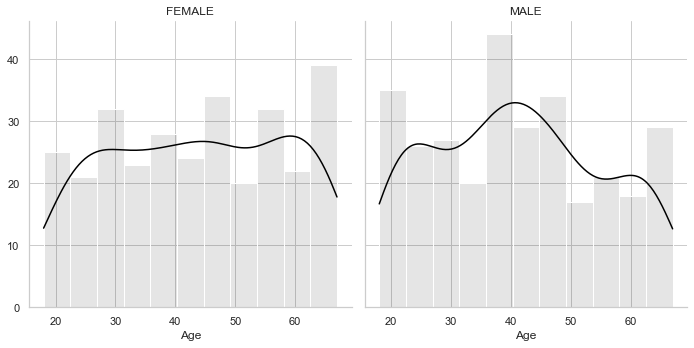

In [97]:
sns.set_style(style='whitegrid')

g = sns.displot(
    data = df_bank,
    x = 'age',
    col = 'sex',
    kind = 'hist',
    kde = True,
    alpha = 0.1,
    color = 'black',
)

g.set_titles(col_template = '{col_name}')
g.set_axis_labels(x_var='Age', y_var='')


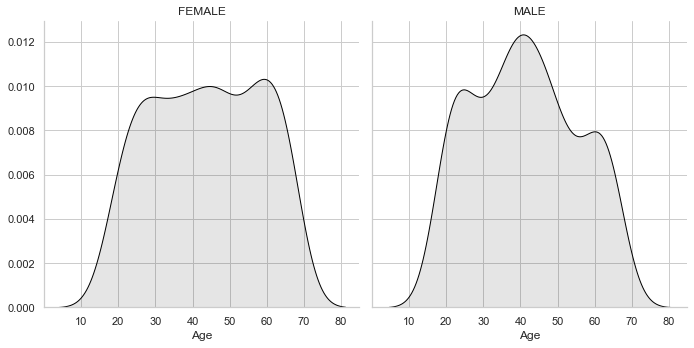

In [181]:
sns.set_style(style='whitegrid')

g = sns.displot(
    data = df_bank,
    x = 'age',
    col = 'sex',
    kind = 'kde',
    fill = True,
    alpha = 0.1,
    color = 'black',    
)

g.set_titles(col_template = '{col_name}')
g.set_axis_labels(x_var='Age', y_var='')


In [172]:
print(f"Female group age skewness: {df_bank.groupby('sex').get_group('FEMALE')['age'].skew()}")
print(f"Male group age skewness: {df_bank.groupby('sex').get_group('MALE')['age'].skew()}")

Female group age skewness: -0.054276974793079795
Male group age skewness: 0.11870557780098265
